In [1]:
from __future__ import division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import tri
from mesher import OblateEllipsoid
import oblate_ellipsoid

from fatiando.gridder import scatter

from fatiando.mesher import Sphere
from fatiando.gravmag import sphere

C:\Users\Vanderlei\Documents\fatiando\fatiando\vis\mpl.py:70: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
ellipsoid = OblateEllipsoid(0, 1000, 1000, 499.9, 500.1,
                             0, 0, 180)

In [3]:
print ellipsoid.transf_matrix

[[  1.00000000e+00  -1.22464680e-16  -7.49879891e-33]
 [  1.22464680e-16   1.00000000e+00   6.12323400e-17]
 [ -0.00000000e+00  -6.12323400e-17   1.00000000e+00]]


In [4]:
area = [-3000, 3000, -2000, 4000]
x, y, z = scatter(area, 300, z=0)

In [5]:
x1, x2, x3 = oblate_ellipsoid.x1x2x3(x, y, z, ellipsoid)
lamb = oblate_ellipsoid._lamb(x1, x2, x3, ellipsoid)
denominator = oblate_ellipsoid._dlamb_aux(x1, x2, x3, ellipsoid, lamb)
dlamb_dx = oblate_ellipsoid._dlamb(x1, x2, x3, ellipsoid, lamb, denominator, deriv='x')
dlamb_dy = oblate_ellipsoid._dlamb(x1, x2, x3, ellipsoid, lamb, denominator, deriv='y')
dlamb_dz = oblate_ellipsoid._dlamb(x1, x2, x3, ellipsoid, lamb, denominator, deriv='z')
h1 = oblate_ellipsoid._hv(ellipsoid, lamb, v='x')
h2 = oblate_ellipsoid._hv(ellipsoid, lamb, v='y')
h3 = oblate_ellipsoid._hv(ellipsoid, lamb, v='z')
g1 = oblate_ellipsoid._gv(ellipsoid, lamb, v='x')
g2 = oblate_ellipsoid._gv(ellipsoid, lamb, v='y')
g3 = oblate_ellipsoid._gv(ellipsoid, lamb, v='z')

a = ellipsoid.small_axis
b = ellipsoid.large_axis
volume = 4*np.pi*a*b*b/3

cte = -1.5*volume

In [6]:
# elements of the depolarization tensor without the ellipsoid
nxx = cte*(dlamb_dx*h1*x1 + g1)
nxy = cte*(dlamb_dx*h2*x2)
nxz = cte*(dlamb_dx*h3*x3)
nyy = cte*(dlamb_dy*h2*x2 + g2)
nyz = cte*(dlamb_dy*h3*x3)
nzz = cte*(dlamb_dz*h3*x3 + g3)

In [7]:
sphere_fat = Sphere(ellipsoid.x, ellipsoid.y, ellipsoid.z,
                    0.5*(ellipsoid.large_axis + ellipsoid.small_axis))

In [8]:
kxx = sphere.kernelxx(x, y, z, sphere_fat)
kxy = sphere.kernelxy(x, y, z, sphere_fat)
kxz = sphere.kernelxz(x, y, z, sphere_fat)
kyy = sphere.kernelyy(x, y, z, sphere_fat)
kyz = sphere.kernelyz(x, y, z, sphere_fat)
kzz = sphere.kernelzz(x, y, z, sphere_fat)

In [9]:
def compare(x, y, z1, z2):
    triang = tri.Triangulation(x, y)
    
    ranges = np.max(np.abs([z1.min(), z1.max(),
                            z2.min(), z2.max()]))

    plt.close('all')
    plt.figure(figsize=(12, 3))
    plt.axis('equal')

    plt.subplot(1, 3, 1)
    plt.tricontourf(triang, z1, 20,
                    vmin=-ranges, vmax=ranges, cmap=plt.get_cmap('RdBu_r'))
    plt.colorbar()
    plt.tick_params(axis='x', labelbottom='off')
    plt.tick_params(axis='y', labelleft='off')

    plt.subplot(1, 3, 2)
    plt.tricontourf(triang, z2, 20,
                    vmin=-ranges, vmax=ranges, cmap=plt.get_cmap('RdBu_r'))
    plt.colorbar()
    plt.tick_params(axis='x', labelbottom='off')
    plt.tick_params(axis='y', labelleft='off')

    plt.subplot(1, 3, 3)
    plt.tricontourf(triang, z1 - z2, 20,
                    cmap=plt.get_cmap('RdBu_r'))
    plt.colorbar()
    plt.tick_params(axis='x', labelbottom='off')
    plt.tick_params(axis='y', labelleft='off')

    plt.tight_layout()

    plt.show()

C:\Anaconda2\lib\site-packages\matplotlib\tri\triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)


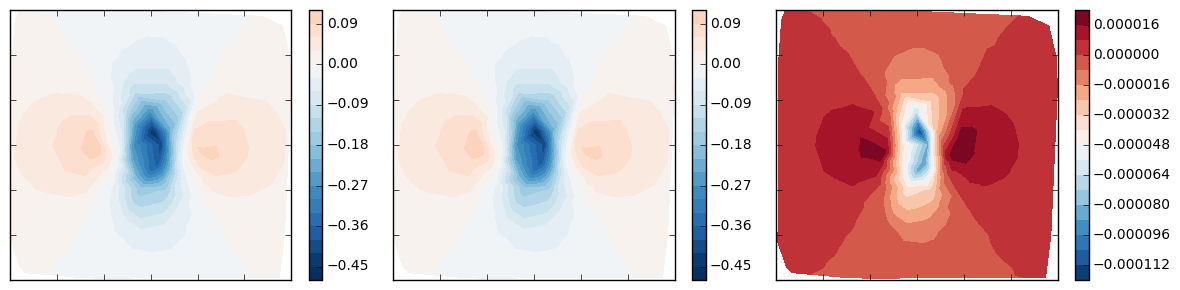

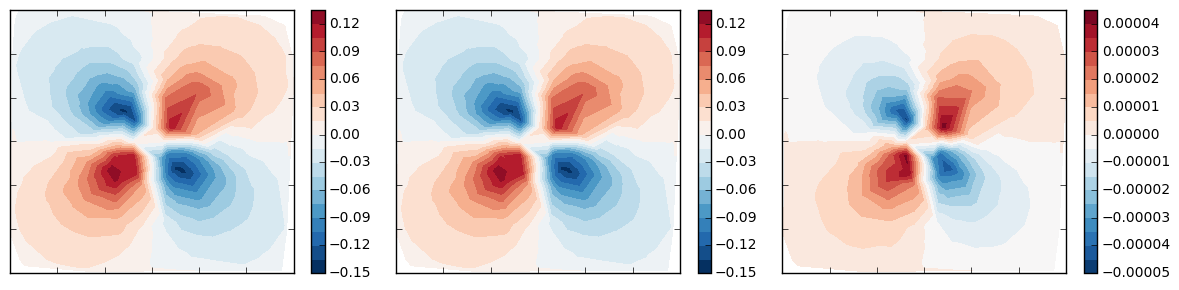

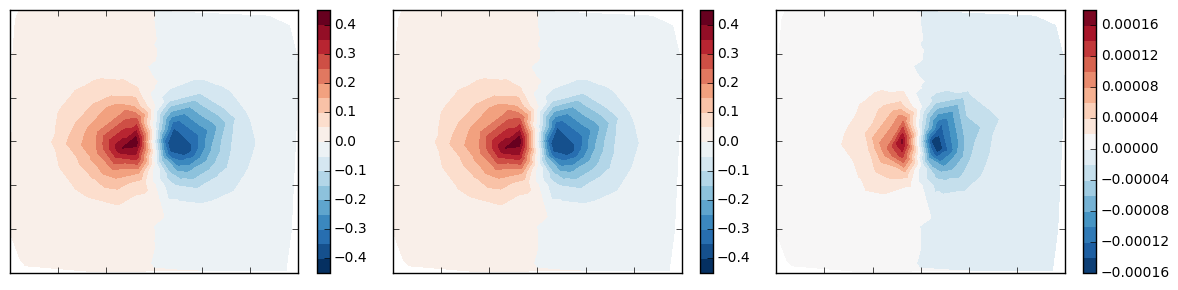

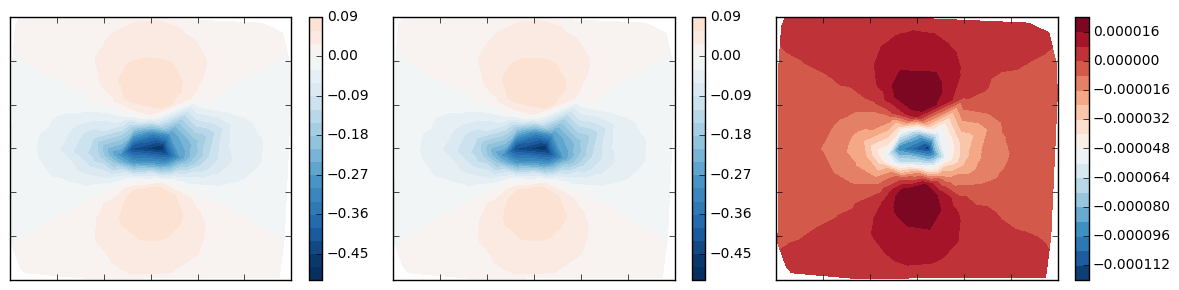

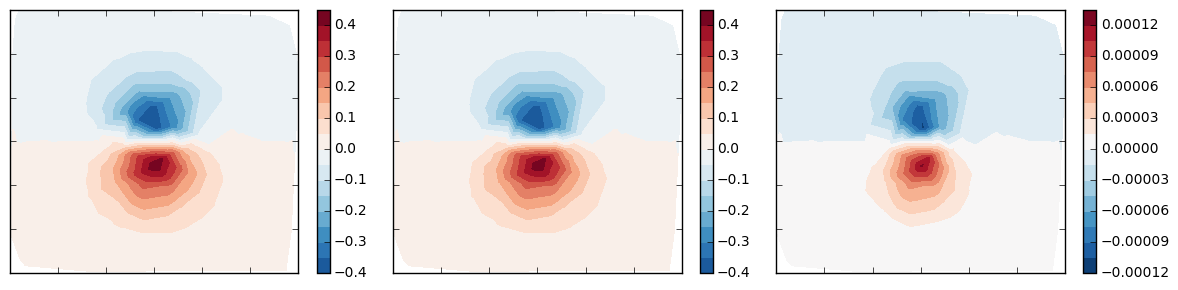

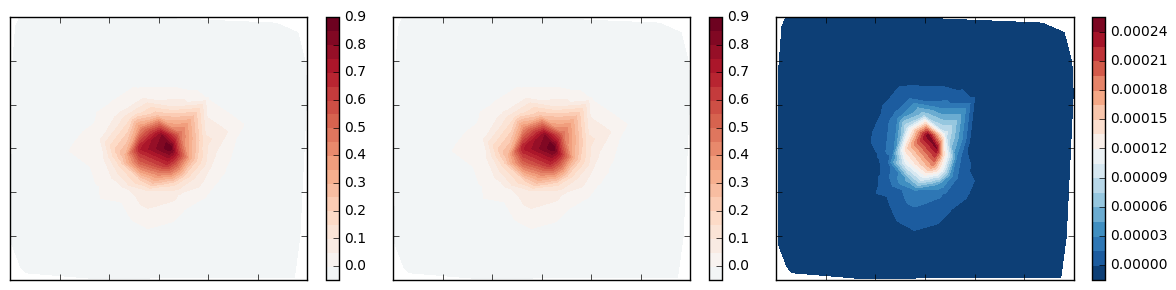

In [10]:
compare(x, y, nxx, kxx)
compare(x, y, nxy, kxy)
compare(x, y, nxz, kxz)
compare(x, y, nyy, kyy)
compare(x, y, nyz, kyz)
compare(x, y, nzz, kzz)